In [57]:
import matplotlib.pyplot as plt
import os,sys
import numpy as np
from dadapy.hamming import *
sys.path.append('../../')
from paths import *

rcpsize = 20
plt.rcParams['xtick.labelsize']= rcpsize
plt.rcParams['ytick.labelsize']=rcpsize
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = rcpsize
plt.rcParams.update({'figure.autolayout': True})
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['ggplot']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8-dark-palette']['axes.prop_cycle'].by_key()['color']
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
# print(plt.rcParams.keys())
#np.set_printoptions(precision=None)
markers = ['p','o','h','^','s','*']
plot_id = 0


In [84]:
L_list = np.arange(70,100+1,10,dtype=int)

N_list = L_list**2
Ns = 5000
Nsteps = int(1E6)
delta = 5E-4
alphamin = 0
alphamax = .1
histfolder = f'distances/results/hist/'

T_list = np.arange(2,2.2+eps,.1)
T_list = np.concatenate((T_list,
                         np.arange(2.21,2.39+eps,.01))
                         )
T_list = np.concatenate((T_list,
                         np.arange(2.4,2.4+eps,.1)
                         )
                         )


ID_BID = np.zeros(shape=(len(L_list),
                        len(T_list)))

for L_id,L in enumerate(L_list):
  for T_id,T in enumerate(T_list):
    optfolder0 = f'../BID/results/opt/L{L}/T{T:.2f}/'
    B = BID(
            alphamin=alphamin,
            alphamax=alphamax,
            seed=1,
            delta=delta,
            Nsteps=Nsteps,
            optfolder0=optfolder0,
            )
    (_,ID_BID[L_id,T_id],_,_,) = B.load_results()

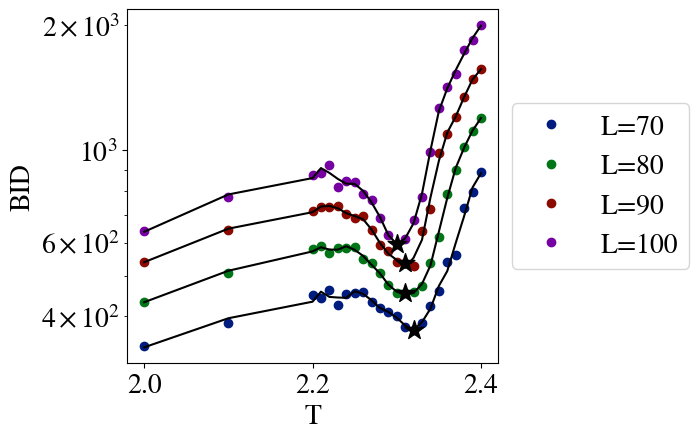

In [85]:
from scipy.signal import savgol_filter

fig,ax = plt.subplots(1)
start = 2
Tc = 2.269
nu = 1
min_idcs = np.zeros(shape=(len(L_list),),dtype=int)
for L_id, L in enumerate(L_list):
  min_idcs[L_id] = np.argmin(ID_BID[L_id,start:])
  lbl = f'{L=}'
  zeta = .4
  ax.plot(
    # (T_list-Tc)**(-nu) * L**(1./nu),
          T_list,
          ID_BID[L_id,:],
          'o',
          #  color=colors[plot_id],
          label=f'{L=}',
          zorder=0,
           )
  y = savgol_filter(ID_BID[L_id,:], window_length=5, polyorder=3, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
  min_idcs[L_id] = np.argmin(y[start:])
  ax.plot(T_list,y,color='black')

  ax.scatter(T_list[start+min_idcs[L_id]],ID_BID[L_id,start+min_idcs[L_id]],marker='*',color='black',s=200)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('BID')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

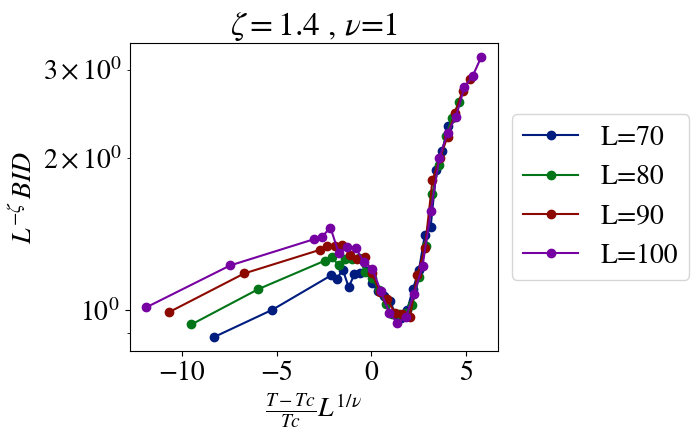

In [134]:
fig,ax = plt.subplots(1)
start = 2
Tc = 2.269
nu = 1

min_idcs = np.zeros(shape=(len(L_list),),dtype=int)
for L_id, L in enumerate(L_list):
  min_idcs[L_id] = np.argmin(ID_BID[L_id,start:])
  lbl = f'{L=}'
  zeta = 1.4
  ax.plot(
          (T_list-Tc)/Tc * L**(1./nu),
          ID_BID[L_id,:] * float(L)**(-zeta),
          '-o',
          #  color=colors[plot_id],
          label=f'{L=}',
          # zorder=0,
           )
  # ax.scatter(T_list[start+min_idcs[L_id]],ID_BID[L_id,start+min_idcs[L_id]],marker='*',color='black',s=200)
ax.set_yscale('log')
ax.set_xlabel(r'$\frac{T-Tc}{Tc}L^{1/\nu}$')
ax.set_ylabel(r'$L^{-\zeta} \, BID $')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title(r'$\zeta=$'+str(zeta) + ' , ' + r'$\nu$='+str(nu))

plt.show()

In [126]:
y = [T_list[idx] for idx in min_idcs]
y

[2.299999999999998, 2.2899999999999983, 2.299999999999998, 2.2799999999999985]

In [127]:
# y = [2.30,2.29,2.29,2.28]

p=array([3.34, 2.25])
cov=array([[ 7.84e+00, -9.38e-02],
       [-9.38e-02,  1.14e-03]])


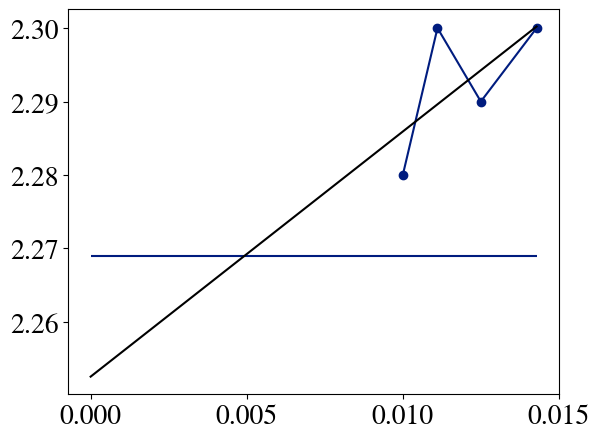

In [128]:
fig,ax = plt.subplots(1)
x = L_list**(-1/nu)
ax.plot(x,
        y,
        marker='o')
p,cov = np.polyfit(x,[T_list[idx] for idx in min_idcs],deg=1,cov=True)
print(f'{p=}')
print(f'{cov=}')
ax.hlines(Tc,0,np.max(x))
ax.plot(np.linspace(0,np.max(x)),np.linspace(0,np.max(x))*p[0] + p[1],color='black')
plt.show()